# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click !here goes the icon of the corresponding button in the gutter! button.
To debug a cell, press Alt+Shift+Enter, or click !here goes the icon of the corresponding button in the gutter! button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/jupyter-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [44]:
import pandas as pd

In [45]:

notas = pd.read_csv("data/ratings.csv")

notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [46]:
notas.shape

(100836, 4)

In [47]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()


,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [48]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [49]:
notas["nota"].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [50]:
notas["nota"].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

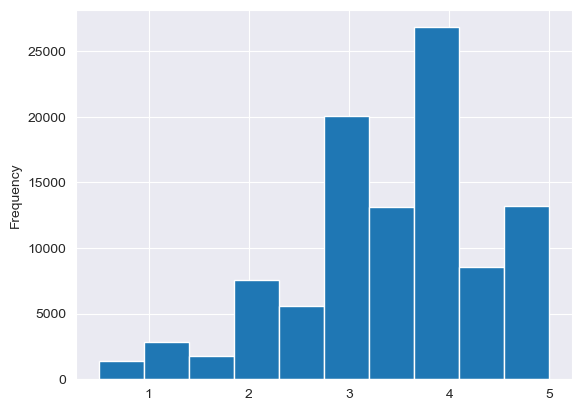

In [51]:
notas["nota"].plot(kind='hist')

In [52]:
mediana = notas["nota"].median()
media = notas["nota"].mean()
print("Mediana de notas ", mediana)
print(f"Media de notas {media}")

Mediana de notas  3.5
Media de notas 3.501556983616962


In [53]:
notas["nota"].describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

<Axes: ylabel='nota'>

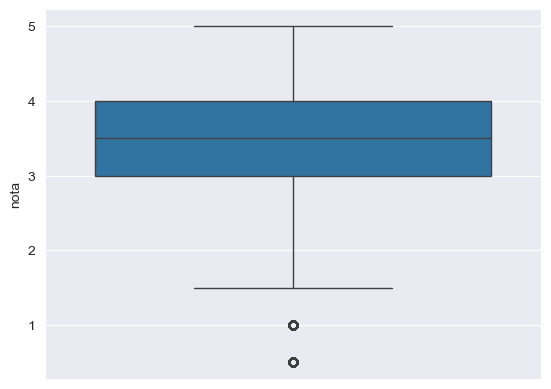

In [54]:
import seaborn as sns

sns.boxplot(notas["nota"])

In [55]:
filmes = pd.read_csv("data/movies.csv")
filmes.columns = ["filmesID", "titulo", "genero"]
filmes.head()

,filmesID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [56]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [57]:
notas.query("filmeId == 1")

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [58]:
notas.query("filmeId == 1")["nota"].mean()

3.9209302325581397

In [59]:
notas.query("filmeId == 2")["nota"].mean()

3.4318181818181817

In [60]:
medias_por_filme = notas.groupby("filmeId")["nota"].mean()
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

<Axes: ylabel='Frequency'>

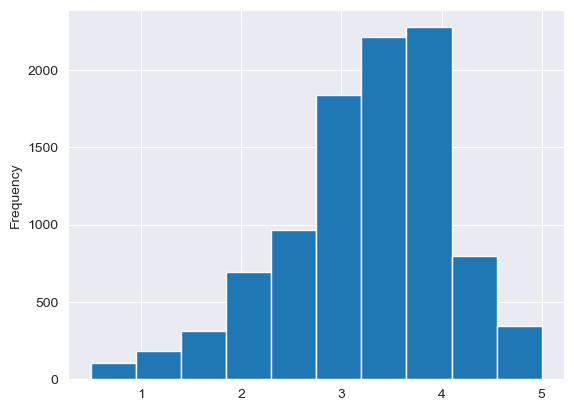

In [61]:
medias_por_filme.plot(kind='hist')

<Axes: ylabel='nota'>

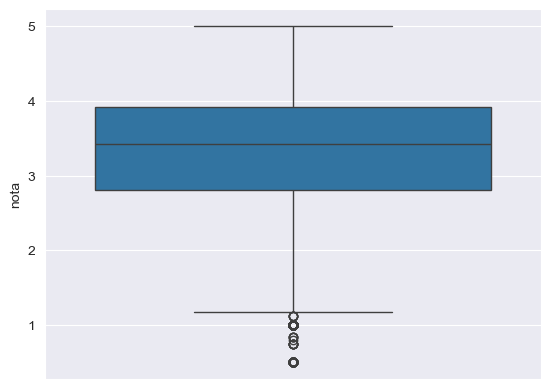

In [62]:
sns.boxplot(medias_por_filme)

In [63]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

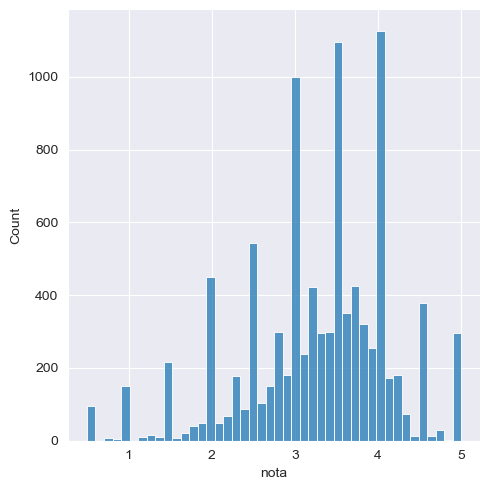

In [64]:
sns.displot(medias_por_filme)

Text(0.5, 1.0, 'Histograma das medias dos filmes')

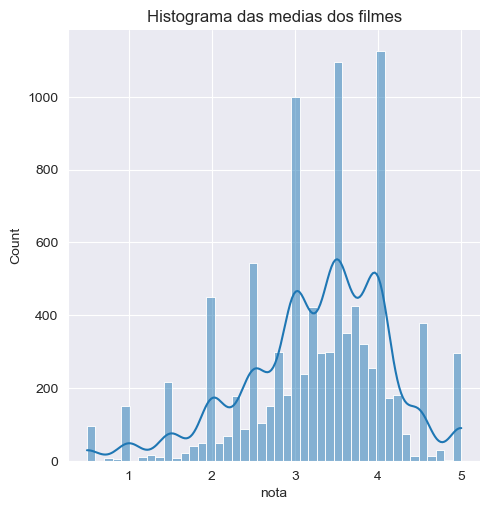

In [65]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True)
plt.title("Histograma das medias dos filmes")

In [66]:
filmes.head(2)

,filmesID,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [67]:
notas_do_toy_story = notas.query("filmeId == 1")["nota"]
notas_do_jumanji = notas.query("filmeId == 2")["nota"]

media_do_toy_story = notas_do_toy_story.mean()
media_do_jumanji = notas_do_jumanji.mean()

mediana_do_toy_story = notas_do_toy_story.median()
mediana_do_jumanji = notas_do_jumanji.median()

print("Media")
print(media_do_toy_story, media_do_jumanji)
print("Mediana")
print(mediana_do_toy_story, mediana_do_jumanji)

Media
3.9209302325581397 3.4318181818181817
Mediana
4.0 3.5


{'whiskers': [<matplotlib.lines.Line2D at 0x21a30d75520>,
 'caps': [<matplotlib.lines.Line2D at 0x21a30d75a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a30d75370>,
 'medians': [<matplotlib.lines.Line2D at 0x21a30d75f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x21a30d76150>,
 'means': []}

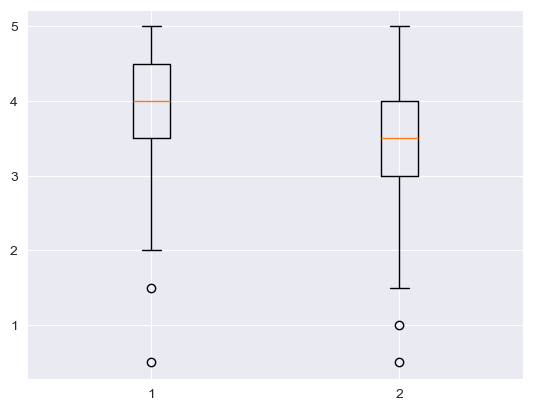

In [68]:
plt.boxplot([notas_do_toy_story, notas_do_jumanji])

<Axes: xlabel='filmeId', ylabel='nota'>

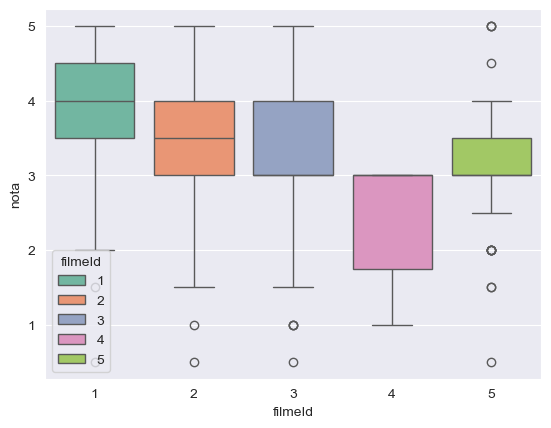

In [75]:
sns.boxplot(data=notas.query("filmeId in [1,2,3,4,5]"),
            x = "filmeId", 
            y="nota",
            hue="filmeId",
            palette="Set2")

In [78]:
notas.groupby("filmeId").count()

,usuarioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [81]:
notas["filmeId"].value_counts().tail()

filmeId
86279     1
86922     1
5962      1
87660     1
163981    1
Name: count, dtype: int64

In [82]:
notas.groupby("filmeId").count().query("nota == 1")

,usuarioId,nota,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
